# Figure 2: Switching curve of mean-field equilibrium and mean-field global optimum
## Trajectory of the dynamics of both policies 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt
from mfg_computation import Parameters, mf_equilibrium, mf_optimum, compute_switching_curve
%matplotlib inline
import ternary


In [2]:
PARAMS = Parameters() # default parameters from paper
gamma = PARAMS.gamma # infection rate
rho = PARAMS.rho     # recovery rate
vac_min, theta = PARAMS.vac_min, PARAMS.theta # min/max vaccination rate
T = PARAMS.T # time horizon

c_V = PARAMS.c_V       # cost per unit time of vaccination
c_I = PARAMS.c_I      # cost per unit time of infection

# initial conditions
S0 = 0.4        # proportion of susceptible at t=0
I0 = 0.4        # proportion of infected at t=0

In [3]:
mfe_pol = np.load('data/equi_mf.npy')
mfopt_pol = np.load('data/globalopt_mf.npy')
                
sw_mfopt_x, sw_mfopt_y = compute_switching_curve(PARAMS, mfopt_pol)     
sw_mfe_x, sw_mfe_y = compute_switching_curve(PARAMS, mfe_pol)     

In [41]:
C = 10000
def compute_traj(thr):
    x_S = np.zeros(C+1)
    x_I = np.zeros(C+1)
    policy = np.zeros(C+1)
    x_S[0] = S0; x_I[0] = I0
    for t in range(C):
        if t < thr*C:
            policy[t] = theta
        else:
            policy[t] = vac_min
        x_S[t+1] = x_S[t]+(-gamma*x_I[t]*x_S[t] - policy[t]*x_S[t])*1./C
        x_I[t+1] = x_I[t]+(gamma*x_S[t] - rho)*x_I[t]*1./C
    return x_S, x_I

def compute_traj_mfe(PARAMS, S0, I0, C):
    cost_mfe, t_mfe = mf_equilibrium(PARAMS, S0, I0, C)
    print(t_mfe)
    x_S, x_I = compute_traj(t_mfe)
    return x_S, x_I
    
def compute_traj_mfopt(PARAMS, S0, I0, C):
    cost_mfopt, t_mfopt = mf_optimum(PARAMS, S0, I0, C);
    print(t_mfopt)
    x_S, x_I = compute_traj(t_mfopt)
    return x_S, x_I

traj_S_mfe, traj_I_mfe  = compute_traj_mfe(PARAMS, S0, I0, C)
traj_S_mfopt, traj_I_mfopt  = compute_traj_mfopt(PARAMS, S0, I0, C)

0.0247
0.0324


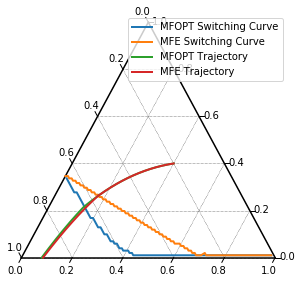

In [42]:
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
#tax.set_title("Plotting of sample trajectory data", fontsize=10)
sw_curve_mfopt = []
for i in range(len(sw_mfopt_x)):
    v_aux = [sw_mfopt_x[i], sw_mfopt_y[i], 1-sw_mfopt_x[i]-sw_mfopt_y[i]]
    sw_curve_mfopt.append(v_aux)
sw_curve_mfe = []
for i in range(len(sw_mfe_x)):
    v_aux = [sw_mfe_x[i], sw_mfe_y[i], 1-sw_mfe_x[i]-sw_mfe_y[i]]
    sw_curve_mfe.append(v_aux)
traj_mfe = []    
for i in range(len(traj_S_mfe)):
    v_aux2 = [traj_S_mfe[i], traj_I_mfe[i]]
    traj_mfe.append(v_aux2)
traj_mfopt = []    
for i in range(len(traj_S_mfopt)):
    v_aux2 = [traj_S_mfopt[i], traj_I_mfopt[i]]
    traj_mfopt.append(v_aux2)

# Plot the data
tax.plot(sw_curve_mfopt, linewidth=2.0, label="MFOPT Switching Curve")
tax.plot(sw_curve_mfe, linewidth=2.0, label="MFE Switching Curve")
tax.plot(traj_mfopt, linewidth=2.0, label="MFOPT Trajectory")
tax.plot(traj_mfe, linewidth=2.0, label="MFE Trajectory")
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

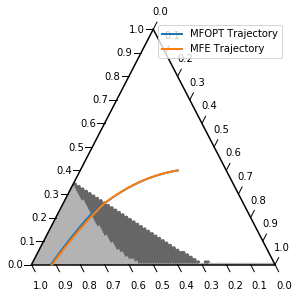

In [43]:
scale = 100

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(6, 5)

tax.boundary()
#tax.gridlines(multiple=0.2, color="black")
#tax.set_title("Plotting of sample trajectory data", fontsize=10)

def f(x):
    swMFOPT = np.interp(x[0], sw_mfopt_x, sw_mfopt_y)
    swMFEQ = np.interp(x[0], sw_mfe_x, sw_mfe_y)
    if x[1] <= swMFOPT:
        return (.7,.7,.7,1)
    elif x[1] <= swMFEQ:
        return (.4,.4,.4,1)
    else:
        return (0,0,0,0)
    
def generate_heatmap_data():
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = f([i/scale, j/scale])
    return d
data = generate_heatmap_data()
#print(data)

tax.heatmap(data, style="hexgonal", use_rgba=True)

# Plot the data
#tax.plot(np.array(sw_curve_mfopt)*scale, linewidth=2.0, label="MFOPT Switching Curve")
#tax.plot(np.array(sw_curve_mfe)*scale, linewidth=2.0, label="MFE Switching Curve")
tax.plot(np.array(traj_mfopt)*scale, linewidth=2.0, label="MFOPT Trajectory")
tax.plot(np.array(traj_mfe)*scale, linewidth=2.0, label="MFE Trajectory")

ticks = [i / float(scale) for i in range(0,scale+1,int(scale/10))]
tax.ticks(ticks=ticks, axis='rlb', linewidth=1, clockwise=True,
          offset=0.03, tick_formats="%0.1f")
#tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

# Hack to remove colorbar: 
figure.delaxes(figure.axes[1])
figure.subplots_adjust(right=0.90)
    
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

<bound method Figure.colorbar of <Figure size 432x360 with 2 Axes>>

In [ ]:
fig = ternary.plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

tax1 = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax1.boundary(linewidth=1.0)
tax1.gridlines(color="black", multiple=10, linewidth=0.5, ls='-')
tax1.ax.axis("equal")
tax1.ax.axis("off")

tax2 = ternary.TernaryAxesSubplot(ax=ax2,scale=30)
axes_colors = {'b': 'r', 'r': 'r', 'l': 'r'}
tax2.boundary(linewidth=1.0)
tax2.gridlines(color="k", multiple=5, linewidth=0.5, ls='-')
tax2.ax.axis("equal")
tax2.ax.axis("off")


def f(x):
    swMFOPT = np.interp(x[0], sw_mfopt_x, sw_mfopt_y)
    swMFEQ = np.interp(x[0], sw_mfe_x, sw_mfe_y)
    if x[1] <= swMFOPT:
        return (.7,.7,.7,1)
    elif x[1] <= swMFEQ:
        return (.4,.4,.4,1)
    else:
        return (0,0,0,0)
    
def generate_heatmap_data():
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = f([i/scale, j/scale])
    return d
data = generate_heatmap_data()
#print(data)

tax.heatmap(data, style="hexgonal", use_rgba=True)

fontsize = 16
tax1.set_title("Entire range")
tax1.left_axis_label("Logs", fontsize=fontsize, offset=0.12)
tax1.right_axis_label("Dogs", fontsize=fontsize, offset=0.12)
tax1.bottom_axis_label("Hogs", fontsize=fontsize, offset=0.)
tax2.set_title("Zoomed region")
tax2.left_axis_label("Logs", fontsize=fontsize, offset=0.17)
tax2.right_axis_label("Dogs", fontsize=fontsize, offset=0.17)
tax2.bottom_axis_label("Hogs", fontsize=fontsize, offset=0.03)

tax1.ticks(multiple=10,offset=0.02)

tax2.set_axis_limits({'b': [0, 50], 'l': [50, 100], 'r': [0, 50]})
tax2.get_ticks_from_axis_limits(multiple=5)
tick_formats = "%.1f"
tax2.set_custom_ticks(fontsize=10, offset=0.025, multiple=5, tick_formats=tick_formats)


# data coords == simplex coords:
#tax1.scatter(points, marker='^', s=25, c='b')
#tax1.heatmap(data, style="hexgonal", use_rgba=True)
# data coords != simplex coords:
points_c = tax2.convert_coordinates(points, axisorder='brl')
#tax2.scatter(points_c, marker='^', s=25, c='b')
#tax.heatmap(data, style="hexgonal", use_rgba=True)
tax1.plot(np.array(traj_mfopt)*scale, linewidth=2.0, label="MFOPT Trajectory")
tax1.plot(np.array(traj_mfe)*scale, linewidth=2.0, label="MFE Trajectory")

tax2.plot(np.array(traj_mfopt)*scale, linewidth=2.0, label="MFOPT Trajectory")
tax2.plot(np.array(traj_mfe)*scale, linewidth=2.0, label="MFE Trajectory")


# draw the zoom region on the first plot
#tax1.line((60, 10, 30), (75, 10, 15), color='r', lw=2.0)
#tax1.line((60, 10, 30), (60, 25, 15), color='r', lw=2.0)
#tax1.line((75, 10, 15), (60, 25, 15), color='r', lw=2.0)

fig.set_facecolor("w")

tax1.ax.set_position([0.01, 0.05, 0.46, 0.8])
tax2.ax.set_position([0.50, 0.05, 0.46, 0.8])

tax1.resize_drawing_canvas()
tax2.resize_drawing_canvas()
ternary.plt.show()